In [1]:
import pandas as pd
import datetime
import yfinance as yf
import backtrader as bt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Date range
start = '2022-03-01'
end = '2022-07-31'

# Tickers of assets
benchmark_index = "^BSESN"
assets = """AXISBANK.NS	BPCL.NS	BRITANNIA.NS	CIPLA.NS	DRREDDY.NS	EICHERMOT.NS	GAIL.NS	HDFCBANK.NS	HINDALCO.NS	HINDUNILVR.NS	INFY.NS	IOC.NS	ITC.NS	M&M.NS	MARICO.NS	ONGC.NS	RELIANCE.NS	SAIL.NS	SBIN.NS	SIEMENS.NS	SUNPHARMA.NS	TATACONSUM.NS	TATAMOTORS.NS	TATAPOWER.NS	TATASTEEL.NS	TITAN.NS VEDL.NS	WIPRO.NS ^BSESN""".split()
assets.sort()

# Downloading data
prices = yf.download(assets, start=start, end=end)
display(prices.head())
prices = prices.dropna()

[*********************100%***********************]  29 of 29 completed


Adj Close                                                    \
           AXISBANK.NS     BPCL.NS BRITANNIA.NS    CIPLA.NS   DRREDDY.NS   
Date                                                                       
2022-03-02  749.109741  336.185577  3282.803223  918.637085  3801.408447   
2022-03-03  736.528931  340.411224  3258.267578  930.380127  3668.912109   
2022-03-04  713.913330  342.327545  3263.058594  926.697998  3777.237305   
2022-03-07  666.535400  332.156464  3052.157715  936.599915  3718.782959   
2022-03-08  669.381104  335.694244  3013.732910  964.862549  3816.601807   

                                                                            \
           EICHERMOT.NS     GAIL.NS  HDFCBANK.NS HINDALCO.NS HINDUNILVR.NS   
Date                                                                         
2022-03-02  2491.518555   97.668327  1358.455200  594.645752   2111.435791   
2022-03-03  2393.570312  101.797874  1355.242554  600.789429   2054.353760   
2022-03-04  2323.784912   99.525024  1350.794312  578.493958   1984.106934   
2022-03-07  2244.710938  103.494492  1309.573608  614.117188   1909.880859   
2022-03-08  2241.135010  100.773491  1312.539185  584.588074   1914.842529   

            ...     Volume                                           \
            ... SIEMENS.NS SUNPHARMA.NS TATACONSUM.NS TATAMOTORS.NS   
Date        ...                                                       
2022-03-02  ...     222618      3807036       1938441      25791134   
2022-03-03  ...     279985      2657776       2112330      29599672   
2022-03-04  ...     192733      4082674       2833168      38765185   
2022-03-07  ...     187390      3065234       2137318      44836205   
2022-03-08  ...     177849      4864275       2850859      55543383   

                                                                          
           TATAPOWER.NS TATASTEEL.NS TITAN.NS   VEDL.NS  WIPRO.NS ^BSESN  
Date                                                                      
2022-03-02     28297089    248475320  3536974  15610682   8177055  12400  
2022-03-03     22429798    174503380  2153478  59451460  12955663   9900  
2022-03-04     22427429    162829230  2652474  19180902  13474186  11000  
2022-03-07     23498823    110400010  1545686  17901437  10556167  17100  
2022-03-08     41105290     91078220  1467595  19093725  11019999  16300  

[5 rows x 174 columns]

In [2]:
############################################################
# Showing data
############################################################

display(prices.head())

Adj Close                                                    \
           AXISBANK.NS     BPCL.NS BRITANNIA.NS    CIPLA.NS   DRREDDY.NS   
Date                                                                       
2022-03-02  749.109741  336.185577  3282.803223  918.637085  3801.408447   
2022-03-03  736.528931  340.411224  3258.267578  930.380127  3668.912109   
2022-03-04  713.913330  342.327545  3263.058594  926.697998  3777.237305   
2022-03-07  666.535400  332.156464  3052.157715  936.599915  3718.782959   
2022-03-08  669.381104  335.694244  3013.732910  964.862549  3816.601807   

                                                                            \
           EICHERMOT.NS     GAIL.NS  HDFCBANK.NS HINDALCO.NS HINDUNILVR.NS   
Date                                                                         
2022-03-02  2491.518555   97.668327  1358.455200  594.645752   2111.435791   
2022-03-03  2393.570312  101.797874  1355.242554  600.789429   2054.353760   
2022-03-04  2323.784912   99.525024  1350.794312  578.493958   1984.106934   
2022-03-07  2244.710938  103.494492  1309.573608  614.117188   1909.880859   
2022-03-08  2241.135010  100.773491  1312.539185  584.588074   1914.842529   

            ...     Volume                                           \
            ... SIEMENS.NS SUNPHARMA.NS TATACONSUM.NS TATAMOTORS.NS   
Date        ...                                                       
2022-03-02  ...     222618      3807036       1938441      25791134   
2022-03-03  ...     279985      2657776       2112330      29599672   
2022-03-04  ...     192733      4082674       2833168      38765185   
2022-03-07  ...     187390      3065234       2137318      44836205   
2022-03-08  ...     177849      4864275       2850859      55543383   

                                                                          
           TATAPOWER.NS TATASTEEL.NS TITAN.NS   VEDL.NS  WIPRO.NS ^BSESN  
Date                                                                      
2022-03-02     28297089    248475320  3536974  15610682   8177055  12400  
2022-03-03     22429798    174503380  2153478  59451460  12955663   9900  
2022-03-04     22427429    162829230  2652474  19180902  13474186  11000  
2022-03-07     23498823    110400010  1545686  17901437  10556167  17100  
2022-03-08     41105290     91078220  1467595  19093725  11019999  16300  

[5 rows x 174 columns]

## 2. Building the Backtest Function with Backtrader

### 2.1 Defining Backtest Function

In [3]:
############################################################
# Defining the backtest function 
############################################################

def backtest(datas, strategy, start, end, plot=False, **kwargs):
    cerebro = bt.Cerebro()

    # Here we add transaction costs and other broker costs
    cerebro.broker.setcash(1000000.0)
    cerebro.broker.setcommission(commission=0.005) # Commission 0.5%
    cerebro.broker.set_slippage_perc(0.005, # Slippage 0.5%
                                     slip_open=True,
                                     slip_limit=True,
                                     slip_match=True,
                                     slip_out=False)
    for data in datas:
        cerebro.adddata(data)

    # Here we add the indicators that we are going to store
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, riskfreerate=0.0)
    cerebro.addanalyzer(bt.analyzers.Returns)
    cerebro.addanalyzer(bt.analyzers.DrawDown)
    cerebro.addstrategy(strategy, **kwargs)
    cerebro.addobserver(bt.observers.Value)
    cerebro.addobserver(bt.observers.DrawDown)
    results = cerebro.run(stdstats=False)
    if plot:
        cerebro.plot(iplot=False, start=start, end=end)
    return (results[0].analyzers.drawdown.get_analysis()['max']['drawdown'],
            results[0].analyzers.returns.get_analysis()['rnorm100'],
            results[0].analyzers.sharperatio.get_analysis()['sharperatio'])

### 2.2 Building Data Feeds for Backtesting

In [4]:
############################################################
# Create objects that contain the prices of assets
############################################################

# Creating Assets bt.feeds
assets_prices = []
for i in assets:
    if i != benchmark_index:
        prices_ = prices.drop(columns='Adj Close').loc[:, (slice(None), i)].dropna()
        prices_.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
        assets_prices.append(bt.feeds.PandasData(dataname=prices_, plot=False))

# Creating Benchmark bt.feeds        
prices_ = prices.drop(
    columns='Adj Close').loc[:, (slice(None), benchmark_index)].dropna()
prices_.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
benchmark = bt.feeds.PandasData(dataname=prices_, plot=False)

display(prices_.head())

,Close,High,Low,Open,Volume
Date,,,,,
2022-03-02,55468.898438,55755.089844,55020.101562,55629.300781,12400
2022-03-03,55102.679688,55996.621094,54931.480469,55921.441406,9900
2022-03-04,54333.808594,55013.269531,53887.718750,54653.589844,11000
2022-03-07,52842.750000,53203.871094,52367.101562,53172.511719,17100
2022-03-08,53424.089844,53484.261719,52260.820312,52430.058594,16300


## 3. Building Strategies with Backtrader

### 3.1 Buy and Hold Sensex

In [5]:
############################################################
# Building the Buy and Hold strategy
############################################################

class BuyAndHold(bt.Strategy):

    def __init__(self):
        self.counter = 0

    def next(self):
        if self.counter >= 1004:
            if self.getposition(self.data).size == 0:
                self.order_target_percent(self.data, target=0.99)
        self.counter += 1 

If you have an error related to 'warnings' modules when you try to plot, you must modify the 'locator.py' file from backtrader library following the instructions in this __[link](https://community.backtrader.com/topic/981/importerror-cannot-import-name-min_per_hour-when-trying-to-plot/8)__.

IndexError: array index out of range

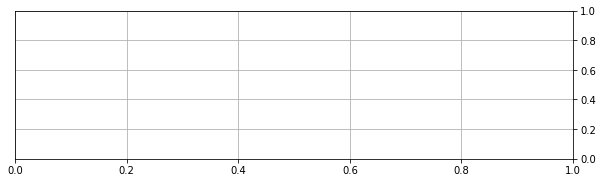

In [6]:
############################################################
# Run the backtest for the selected period
############################################################
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6) # (w, h)
plt.plot() # We need to do this to avoid errors in inline plot

start = 1004
end = prices.shape[0] - 1

dd, cagr, sharpe = backtest([benchmark],
                            BuyAndHold,
                            start=start,
                            end=end,
                            plot=True)

In [ ]:
############################################################
# Show Buy and Hold Strategy Stats 
############################################################

print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

Max Drawdown: 60.88%
CAGR: 10.54%
Sharpe: 0.514


### 3.2 Rebalancing Quarterly using Riskfolio-Lib

In [ ]:
############################################################
# Calculate assets returns
############################################################

pd.options.display.float_format = '{:.4%}'.format

data = prices.loc[:, ('Adj Close', slice(None))]
data.columns = assets
data = data.drop(columns=[benchmark_index]).dropna()
returns = data.pct_change().dropna()
display(returns.head())

,AXISBANK.NS,DRREDDY.NS,HDFCBANK.NS,HINDUNILVR.NS,INFY.NS,RELIANCE.NS,SBIN.NS,TATAMOTORS.NS,TITAN.NS,VEDL.NS,WIPRO.NS
Date,,,,,,,,,,,
2000-01-04,3.8610%,8.0027%,2.2353%,-1.1484%,7.8764%,8.0056%,6.3411%,-3.9446%,-5.3308%,-1.4181%,8.0005%
2000-01-05,-2.6022%,-3.7386%,-3.9413%,-3.5576%,-7.9999%,3.9176%,-4.1104%,2.4256%,-6.1058%,-0.6103%,1.6298%
2000-01-06,-2.4809%,5.9628%,0.8086%,4.0138%,-8.0000%,4.1947%,5.0513%,4.1501%,8.0202%,4.6491%,-1.9347%
2000-01-07,-4.8924%,-7.9715%,0.0297%,5.4519%,-8.0000%,6.8626%,4.7126%,8.0144%,-2.1070%,-2.3471%,-7.9990%
2000-01-10,3.0864%,-1.6480%,-1.4553%,0.7584%,4.8135%,-1.9234%,-1.3904%,7.8991%,-0.9908%,2.1460%,0.1353%


In [ ]:
############################################################
# Selecting Dates for Rebalancing
############################################################

# Selecting last day of month of available data
index = returns.groupby([returns.index.year, returns.index.month]).tail(1).index
index_2 = returns.index

# Quarterly Dates
index = [x for x in index if float(x.month) % 3.0 == 0 ] 

# Dates where the strategy will be backtested
index_ = [index_2.get_loc(x) for x in index if index_2.get_loc(x) > 1000]

In [ ]:
############################################################
# Building Constraints
############################################################

asset_classes = {'Assets': """AXISBANK.NS	BPCL.NS	BRITANNIA.NS	CIPLA.NS	DRREDDY.NS	EICHERMOT.NS	GAIL.NS	HDFCBANK.NS	HINDALCO.NS	HINDUNILVR.NS	INFY.NS	IOC.NS	ITC.NS	M&M.NS	MARICO.NS	ONGC.NS	RELIANCE.NS	SAIL.NS	SBIN.NS	SIEMENS.NS	SUNPHARMA.NS	TATACONSUM.NS	TATAMOTORS.NS	TATAPOWER.NS	TATASTEEL.NS	TITAN.NS VEDL.NS	WIPRO.NS""".split(),
                 'Industry': ['Consumer Discretionary','Consumer Discretionary',
                              'Consumer Discretionary', 'Consumer Staples',
                              'Consumer Staples','Energy','Financials',
                              'Financials','Financials','Financials',
                              'Health Care','Health Care','Industrials','Industrials',
                              'Industrials','Health care','Industrials',
                              'Information Technology','Information Technology',
                              'Materials','Telecommunications Services','Utilities',
                              'Utilities', 'Telecommunications Services', 'Financials', 'Financials', 'Financials', 'Financials']}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

constraints = {'Disabled': [True, True, True],
               'Type': ['All Assets', 'All Classes', 'All Classes'],
               'Set': ['', 'Industry', 'Industry'],
               'Position': ['', '', ''],
               'Sign': ['<=', '<=', '>='],
               'Weight': [0.10, 0.20, 0.03],
               'Type Relative': ['', '', ''],
               'Relative Set': ['', '', ''],
               'Relative': ['', '', ''],
               'Factor': ['', '', '']}

constraints = pd.DataFrame(constraints)

display(constraints)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,True,All Assets,,,<=,10.0000%,,,,
1,True,All Classes,Industry,,<=,20.0000%,,,,
2,True,All Classes,Industry,,>=,3.0000%,,,,


In [ ]:
############################################################
# Building constraint matrixes for Riskfolio Lib
############################################################

import riskfolio as rp

A, B = rp.assets_constraints(constraints, asset_classes)

In [ ]:
%%time
############################################################
# Building a loop that estimate optimal portfolios on
# rebalancing dates
############################################################

models = {}

# rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM',
#        'CVaR', 'WR', 'MDD', 'ADD', 'CDaR']

rms = ['MV']

for j in rms:
    
    weights = pd.DataFrame([])

    for i in index_:
        Y = returns.iloc[i-1000:i,:] # taking last 4 years (250 trading days per year)

        # Building the portfolio object
        port = rp.Portfolio(returns=Y)
        
        # Add portfolio constraints
        #port.ainequality = A
        #port.binequality = B
        
        # Calculating optimum portfolio

        # Select method and estimate input parameters:

        method_mu='hist' # Method to estimate expected returns based on historical data.
        method_cov='hist' # Method to estimate covariance matrix based on historical data.

        port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)
        
        # Estimate optimal portfolio:
        
        #port.solvers = ['MOSEK']
        #port.alpha = 0.05
        model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
        rm = j # Risk measure used, this time will be variance
        obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
        hist = True # Use historical scenarios for risk measures that depend on scenarios
        rf = 0 # Risk free rate
        l = 0 # Risk aversion factor, only useful when obj is 'Utility'

        w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

        if w is None:
            w = weights.tail(1).T
        weights = pd.concat([weights, w.T], axis = 0)
    
    models[j] = weights.copy()
    models[j].index = index_
    print(models[j])


      AXISBANK.NS  DRREDDY.NS  HDFCBANK.NS  HINDUNILVR.NS  INFY.NS  \
1056     27.3513%     4.8198%      0.0000%        0.0000%  0.0000%   
1118     33.8808%     7.6357%      3.9989%        0.0000%  0.0000%   
1184     18.4177%     5.7681%      9.8130%        0.0000%  0.0000%   
1246     14.4762%     5.3017%     15.1336%        0.0000%  0.0000%   
1307     25.4823%     3.9140%     10.7580%        0.0000%  0.0000%   
...           ...         ...          ...            ...      ...   
5296      0.0000%    11.8640%      0.0000%       14.9601% 26.7848%   
5359      0.0000%    12.4958%      0.0000%       11.2566% 32.2123%   
5422      0.0000%    15.0272%      0.0000%        2.2249% 34.7663%   
5483      0.0000%    14.8065%      0.0000%        0.0000% 33.4155%   
5545      0.0000%    26.8752%      0.0000%        0.0000% 26.6556%   

      RELIANCE.NS  SBIN.NS  TATAMOTORS.NS  TITAN.NS  VEDL.NS  WIPRO.NS  
1056      7.5018% 21.5885%       10.5517%   0.0000% 28.1869%   0.0000%  
1118      0.0

In [ ]:
############################################################
# Building the Asset Allocation Class
############################################################

class AssetAllocation(bt.Strategy):

    def __init__(self):

        j = 0
        for i in assets:
            setattr(self, i, self.datas[j])
            j += 1
        
        self.counter = 0
        
    def next(self):
        if self.counter in weights.index.tolist():
            for i in assets:
                w = weights.loc[self.counter, i]
                self.order_target_percent(getattr(self, i), target=w)
        self.counter += 1

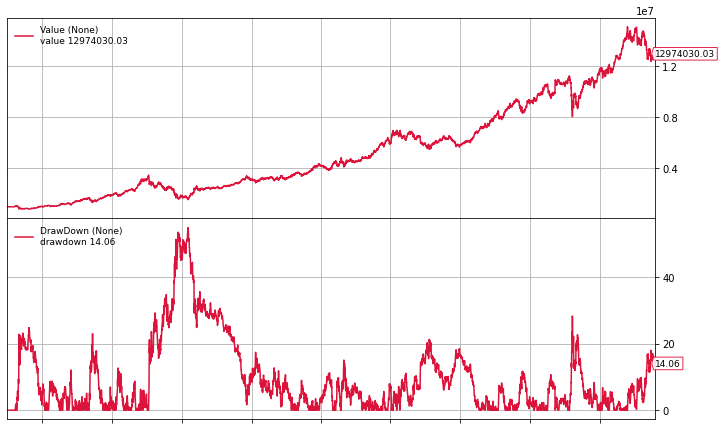

In [ ]:
############################################################
# Backtesting Mean Variance Strategy
############################################################

assets = returns.columns.tolist()
weights = models['MV']

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)

In [ ]:
############################################################
# Show Mean Variance Strategy Stats 
############################################################

print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

Max Drawdown: 54.93%
CAGR: 12.31%
Sharpe: 0.643
